# Приоритизация гипотез и анализ результатов A/B теста

Совместно с отделом маркетинга интернет-магазина был подготовлен список гипотез для увеличения выручки.

## Задачи проекта

1. Приоритизация гипотез фреймворками ICE и RICE для выбора первоочередных.
2. Анализ результатов проведенного A/B-теста с целью определения наличия или отсутствия статистической значимости в изменениях метрик для проверяемой в ходе теста гипотезы.

## Часть 1. Приоритизация гипотез

### Знакомство с данными

Подключим необходимые для работы библиотеки, считаем данные, изучим их.

In [1]:
import pandas as pd
import datetime as dt

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('datasets/hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


В файле представлены девять гипотез по увеличению выручки. Отдел маркетинга уже оценил параметры их проведения: Reach, Impact, Confidence, Effort (охват аудитории, степень влияния, уверенность в гипотезе, трудозатраты на ее проверку).

Нам остается только применить фреймворки ICE и RICE для выбора наиболее приоритетных гипотез для проверки.

### Приоритизация по ICE

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)

hypothesis.sort_values('ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


Наивысший приоритет получила гипотеза **№8** ввиду того, что маркетологи высоко оценили свою уверенность в этой гипотезе и ее влияние на аудиторию и поставили довольно низкую оценку критерию трудозатрат на ее проверку.

Следом идут гипотезы №№ **0** и **7**.

### Приоритизация по RICE

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [5]:
hypothesis['RICE'] = round(
    hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2
)

hypothesis.sort_values('RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


По этому фреймворку наивысший приоритет получила гипотеза **№7**, так как помимо высоких оценок Impact и Confidence она имеет высокую оцнку Reach (по доле затрагиваемых пользователей). На второе место поднялась гипотеза **№2** так же по причине высокой оценки Reach.

Гипотзеа **№0** так же вошла в тройку, как и при оценке по методу ICE. Гипотеза **№8**, занимавашая первое место по ICE, по RICE опстилась на пятое место из-за низкой оценки Reach.

### Вывод по первой части

Выбор фреймворка вляияет на приоритизацию гипотез и их выбор для проверки. Оценки параметров играют важную роль в расчете приоритетов как по методу ICE, так и по методу RICE.

## Чсть 2. Анализ A/B-теста

A/B-тест проведен. Проанализируем его результаты.

Задачи анализа:

1. Анализ кумулятивной выручки, кумулятивного среднего чека и кумулятивной конверсии по группам. Анализ относительных значений между группами в течение теста.
2. Выявление возможных аномалий по количеству заказов на отдельно взятого пользователя и размерам одного чека, фильтрация (удаление) аномальных пользователей и аномальных заказов из данных.
3. Расчет статистической значимости различий в среднем количестве заказов на посетителя и в среднем чеке заказа между группами теста по "сырым" данным и по данным, очищенным от аномалий.
4. Принятие решения по результатам теста.

### Знакомство с данными

Подключим необходимые для проведения анализа библиотеки, считаем данные, ознакомимся с ними.

In [6]:
import datetime as dt
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from math import sqrt as sqrt

In [7]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('datasets/orders.csv')
    visitors = pd.read_csv('datasets/visitors.csv')

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
print(visitors['date'].min())
print(visitors['date'].max())
print(orders['date'].min())
print(orders['date'].max())

2019-08-01
2019-08-31
2019-08-01
2019-08-31


Имеем два файла с результатами теста, проведенного в период с 2019-08-01 по 2019-08-31.

В файле orders представлены 1197 записей со следующми столбцами:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

В файл visitors представлены 62 записи со следующми столбцами:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Предобработка данных

Проверим данные на дубликаты. Удалим их при наличии.

In [13]:
orders[orders.duplicated()]['transactionId'].count()

0

Полных явных дубликатов в таблице заказов не выявлено.

Проверим, нет ли задвоенных транзакций.

In [14]:
orders[orders.duplicated(['transactionId'])]['transactionId'].count()

0

Задвоенные транзакции так же отсутствуют.

Убедимся в отсутствии дубликатов в таблице посещаемости

In [15]:
visitors[visitors.duplicated()]['visitors'].count()

0

In [16]:
visitors[visitors.duplicated(['date', 'group'])]['visitors'].count()

0

В таблице посещаемости так же отсутствуют дубликаты.

Преобразуем столбцы с датой в соответствующий тип данных.

In [17]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### Проверка исходных данных

Для правильного анализа результатов А/Б теста убедимся в корректности собранных в ходе него данных и их пригодности для анализа.

#### Проверка отсутствия пересечений между группами 

Проверим, нет ли случаев ошибочного попадания заказов одних и тех же пользователей в разные группы теста.

In [18]:
usersA = pd.DataFrame(orders[orders['group'] == 'A']['visitorId'].unique(), columns=['userId'])
usersB = pd.DataFrame(orders[orders['group'] == 'B']['visitorId'].unique(), columns=['userId'])
crossedUsers = usersA.merge(usersB, on='userId')

In [19]:
print('Количество покупателей, оказавшихся в обеих группах: {}'.format(crossedUsers['userId'].count()))

Количество покупателей, оказавшихся в обеих группах: 58


Имеем 58 покупателей, покупки которых оказались как в группе А, так и в группе В. Это свидетельсвтует об ошибках при проведении теста или при сборе данных. Одни и те же пользователи не должны попадать в разные группы теста. Таких покупателей нужно исключить из выборок, так как для них невозможно однозначно определить, повлияла ли на них тестируемая гипотеза. Анализ такого А/Б теста будет некорректен.

Исключим данные об этих пользователях из таблицы с заказми.

In [20]:
orders = orders[np.logical_not(orders['visitorId'].isin(crossedUsers['userId']))].reset_index(drop=True)

К сожалению, исключить этих пользователей из таблицы с посещениями мы не можем, так как в ней собраны агрегированные данные по количеству посетителей.

#### Проверка равномерности разделения на группы

Убедимся в том, что пользователи в ходе проведения теста были разделены на группы в равных долях.

In [21]:
visitorsDistribution = visitors.groupby('group', as_index=False).agg({'visitors' : 'sum'})

In [22]:
visitorsDistribution['portion'] = (
    visitorsDistribution['visitors'] 
    / visitorsDistribution['visitors'].sum()
)

In [23]:
visitorsDistribution

,group,visitors,portion
0,A,18736,0.49761
1,B,18916,0.50239


In [24]:
print(
    'Относительное различие числа пользователей в группах теста: {}%'
    .format(
        round(
            (visitorsDistribution[visitorsDistribution['group'] == 'B']['portion'].iloc[0] 
            / visitorsDistribution[visitorsDistribution['group'] == 'A']['portion'].iloc[0] - 1) * 100, 
            2
        )
    )
)

Относительное различие числа пользователей в группах теста: 0.96%


В группу Б попало немного больше пользователей, чем в группу А. Однако разница между долями менее 1%. Будем считать, что пользователи разделены в ходе теста корректно.

#### Вывод по пункту

При проверке исходных данных были выявлены пересечения между группами: заказы некоторых пользователей оказались в обеих группах. Для корректного анализа теста такие пользователи были удалены из датасетов.

Также было проверено, что пользователи в ходе теста были разделены между группами в равных долях.

Можно приступать к анализу результатов А/Б-теста.

### Расчет кумулятивных показателей

Подготовим общий датафрейм, связав данные по датам, разделив показатели по группам и расчитав кумулятивные показатели на каждую дату.

In [25]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [26]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Подготовили общий датасет: разделили показатели по группам теста, посчитали суммарные количества заказов и выручки по группам по дням теста, а также кумулятивные показатели количества заказов, количества посетителей и суммарной выручки по группам.

### Анализ кумулятивных показателей

#### Анализ кумулятивной выручки

Построим график кумулятивной выручки по группам.

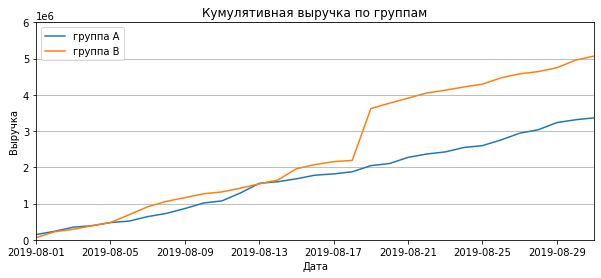

In [27]:
plt.figure(figsize=[10, 4])
plt.plot(data['date'], data['revenueCummulativeA'], label='группа A')
plt.plot(data['date'], data['revenueCummulativeB'], label='группа B')
plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 6000000])
plt.grid(axis='y');

Кумулятивная выручка группы B стабильно выше кумулятивной выручки группы A. Выручка группы А равномерно увеличивается в течение всего теста. А вот в группе B имеется сильный скачок выручки в середине теста. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке в эти даты. Далее изучим этот момент в данных.

#### Анализ кумулятивного среднего чека

Построим график кумулятивного среднего чека по группам.

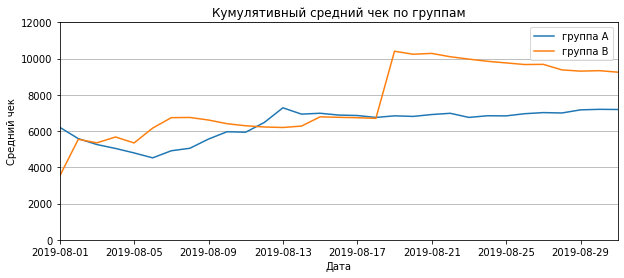

In [28]:
plt.figure(figsize=[10, 4])
plt.plot(data['date'], data['revenueCummulativeA'] / data['ordersCummulativeA'], label='группа A')
plt.plot(data['date'], data['revenueCummulativeB'] / data['ordersCummulativeB'], label='группа B')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 12000])
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid(axis='y');

Средний чек в группе А стабилизировался уже к середине теста.

В группе В произошел резкий скачок среднего чека в середине теста. Видимо, здесь в эту группу попали крупные заказы. Затем средний чек в этой группе стал постепенно снижаться. Чтобы прийти к реальному среднему чеку и установиться на его уровне, для группы В нужно больше данных. 

Построим график относительного различия для среднего чека между группами.

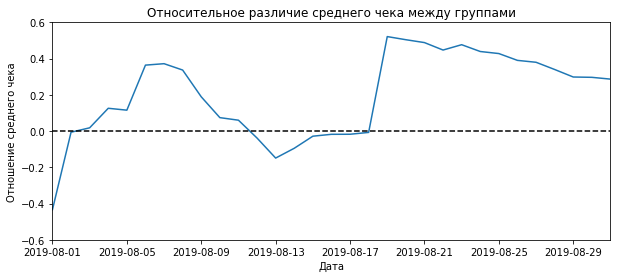

In [29]:
plt.figure(figsize=[10, 4])
plt.plot(data['date'], 
         (data['revenueCummulativeB'] / data['ordersCummulativeB'])
         / (data['revenueCummulativeA'] / data['ordersCummulativeA']) - 1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.6, 0.6])
plt.title('Относительное различие среднего чека между группами')
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека');

В целом, график различия среднего чека между сегментами распологается в положительной зоне координатной сетки. Это говорит о том, что в основном на протяжении теста средний чек в группе В был выше среднего чека в группе А.

Однако, в нескольких точках график  резко «скачет». Это говорит о попадании в выборки курпных заказов.

Также по графику можно сказать, что оношение средних чеков не стабилизировалось и к концу теста стало постепенно снижаться. Чтобы прийти к реальному значению и установиться на его уровне, нужно больше данных.

#### Анализ кумулятивной конверсии

Построим график кумулятивного среднего количества заказов на посетителя по группам.

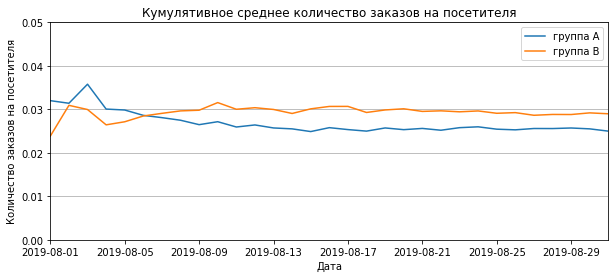

In [30]:
plt.figure(figsize=[10, 4])
plt.plot(data['date'], data['ordersCummulativeA'] / data['visitorsCummulativeA'], label='группа A')
plt.plot(data['date'], data['ordersCummulativeB'] / data['visitorsCummulativeB'], label='группа B')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.title('Кумулятивное среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Количество заказов на посетителя')
plt.grid(axis='y');

В начале теста сегмент А имел более высоку конверсию, чем сегмент В. Но затем конверсия сигмента А снизилась, а сегдмента В возросла. Значения конверсий зафиксировались к середине теста. Конверсия сегмента В стала стабильно выше конверсии сегмента А.

Возможно, в первые даты теста на конверсию оказывли влияния факторы привлечения клиентов, имевшие место до запуска теста, так как для клиентов характерно наличие некоторого промежутка времени между проявлением интереса к товару и моментом принятия окончательного решения о покупке.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

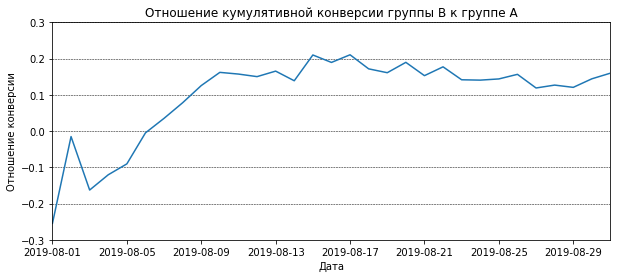

In [31]:
plt.figure(figsize=[10, 4])

plt.plot(data['date'], 
         (data['ordersCummulativeB'] / data['visitorsCummulativeB']) 
         / (data['ordersCummulativeA'] / data['visitorsCummulativeA']) - 1)

plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.3, 0.3])
plt.title('Отношение кумулятивной конверсии группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Отношение конверсии');

К концу первой недели теста группа В превзошла группу А по конверсии, показывая значение от 10% до 20% выше относительно группы А.

#### Результаты анализа кумулятивных показателей

Кумулятивные показатели выручки, среднего чек и конверсии в группе B выше кумулятивных показателей группы A.

Однако, на графиках имеются сильные скачки, говорящие о попадании в выборки в некоторые моменты теста аномально дорогих заказов или их аномально большого числа.

Необходимо изучить этот момент, что мы и сделаем далее.

Также по графику среднего чека можно увидеть, что в группе Б этот показатель не стабилизировался и продолжает снижаться к концу теста. Чтобы прийти к реальному среднему чеку и установиться на его уровне, для группы В нужно больше данных.

### Определение аномалий и выбросов в данных

#### Определение аномалий в количестве заказов

Построим точечный график количества заказов по пользователям.

In [32]:
ordersByUsers = (
    orders
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

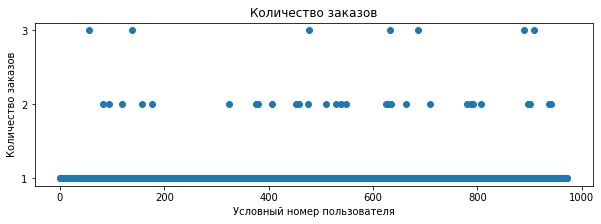

In [33]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=[10, 3])
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов')
plt.xlabel('Условный номер пользователя')
plt.ylabel('Количество заказов')
plt.yticks([1, 2, 3]);

Явных выбросов в количестве заказов на одного пользователя не выявлено.

Подавляющее большинство пользователей сделали 1 покупку. Но также в выборку попало большое число пользователей, совершивших 2 и 3 заказа. Нужно понять, считать их аномалиями или нет.

Для этого посчитаем выборочные перцентили количества заказов на одного пользователя.

In [34]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


99% пользователей оформили не более двух заказов, 95% - не более одного.

Выберем два заказа в качестве верхней границы, выше которой пользователей будем считать аномальными. И далее отсеем этот 1% пользователей.

#### Определение аномальных стоимостей заказов

Посмотрим на самые дорогие заказы и на распределение цен заказов.

In [35]:
orders.sort_values('revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
365,590470918,1920142716,2019-08-19,1294500,B
1015,3936777065,2108080724,2019-08-15,202740,B
971,666610489,1307669133,2019-08-13,92550,A
632,3668308183,888512513,2019-08-27,86620,B
631,3603576309,4133034833,2019-08-09,67990,A
939,1348774318,1164614297,2019-08-12,66350,A
937,316924019,148427295,2019-08-12,65710,A
811,1347999392,887908475,2019-08-21,60450,A
802,2420050534,4003628586,2019-08-08,58550,B
109,3163614039,2254586615,2019-08-22,53904,A


Среди 10 крупнейших заказов цены находятся в пределах 100 000 рублей. Кроме двух, цены которых составляют 202 740 и 1 294 500. Оба этих заказ приходятся на группу B.

Попадание таких заказов в одну из групп теста исказит результат. При этом такие покупки - редкость. Их всего две из более чем тысячи записей, имеющихся в таблице. Их вполне можно считать случайностью, а не результатом тестирования гипотезы.

Изучим точечный график стоимостей заказов:

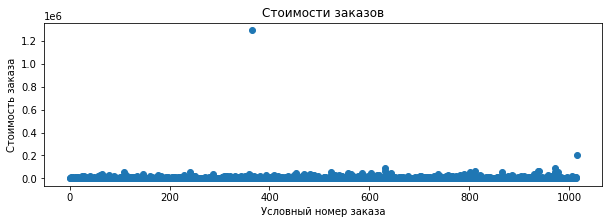

In [36]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=[10, 3])
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимости заказов')
plt.xlabel('Условный номер заказа')
plt.ylabel('Стоимость заказа');

На графике хорошо виден уникальный заказ, цена которого очень сильно отличатеся от остальных. А также второй по величине заказ, который также стоит особняком. Вероятнее всего, эти заказ попали в выборку случайно, и не могут считаться результатом тестирования гипотезы.

Кроме этих двух заказов, цены остальных заказов укладываются в диапазон до 100 000. Изменим границы графика, чтобы посмотреть на самые распространенные значения цен заказов:

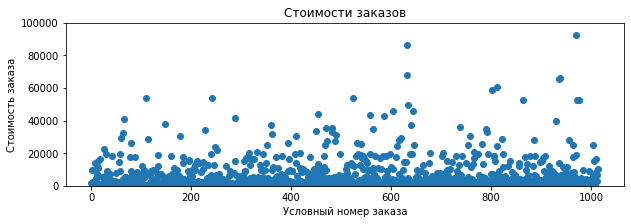

In [37]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=[10, 3])
plt.scatter(x_values, orders['revenue'])
plt.ylim([0, 100000])
plt.title('Стоимости заказов')
plt.xlabel('Условный номер заказа')
plt.ylabel('Стоимость заказа');

По графику видно, что большинство заказов совершалось на сумму до 20 000. Однако также имеется много заказов на сумму от 20 000 до 100 000. Нужно определить, какие заказы считать аномально большими. Для этого посчитаем выборочные перцентили, чтобы определить точную границу для удаления аномально больших заказов:

In [38]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Более 99% всех заказов совершались на сумму до 54 000. Выберем это значение за границу, а все, что выше, будем считать аномалиями. Далее удалим эти аномальные заказы из выборок.

#### Результат выявления аномалий

Явных выбросов в количестве заказов на одного пользователя не выявлено. Все пользователи совершили от 1 до 3 заказов. При этом 99% - не более двух. Пользователей, совершивших более двух покупок за период теста, будеи считать аномальными и удалим из выборок.

В сумме чека одного заказа обнаружены явные выбросы - очень редкие крупные заказы. Оба крупнейших чека попали в группу Б. Они-то и исказили кумулятивные показатели. Также было расчитано, что 99% покупателей совершили покупку на сумму менее 54 000. Все, что больше этой суммы, будем считать аномалиями и удалим пользователей, сделавших такие заказы, из выборок.

### Проверка гипотезы о статистической значимости различий между группами теста

#### Расчет статистической значимости различий по "сырым" данным

##### Гипотеза о различии в среднем количестве заказов на посетителя

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем количестве заказов между группами есть. Установим уровень значимости равный 5%.

In [39]:
alpha = 0.05

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным — без удаления аномальных пользователей.

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [40]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [41]:
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, 
               index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
               name='orders')],
    axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, 
               index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
               name='orders')],
    axis=0)

Применим критерий Манна-Уитни. Посчитаем p-value.

Чтобы получить среднее число заказов на пользователя, найдём среднее в каждой из выборок методом mean(). Выведем относительный прирост среднего числа заказов группы B.

In [42]:
p_value = st.mannwhitneyu(sampleA, sampleB)[1]

print('p-value по Манну-Уитни по "сырым" данным: {:.2%}'.format(p_value))
print()
print('Относительный прирост среднего числа заказов по "сырым" данным: {:.2%}'
      .format(sampleB.mean() / sampleA.mean() - 1))
print()
if p_value < alpha:
    print('Имеется статистически значимое различие. Отвергаем нулевую гипотезу.')
else:
    print('Статистически значимое различие отсутствует. Ну удалось отвергнуть нулевую гипотезу.')

p-value по Манну-Уитни по "сырым" данным: 1.10%

Относительный прирост среднего числа заказов по "сырым" данным: 15.98%

Имеется статистически значимое различие. Отвергаем нулевую гипотезу.


По "сырым" данным мы видим статистически значимый прирост среднего числа заказов в группе В к группе А. Поэтому можем отвергнуть нулевую гипотезу о том, что различий в среднем количестве заказов между группами нет.

##### Гипотеза о различии в среднем чеке заказа

Сформулируем гипотезы. Нулевая: различий в среднем чеке заказа между группами нет. Альтернативная: различия в среднем чеке заказа между группами есть. Оставим уровень значимости равный 5%. Применим критерий Манна-Уитни и посчитаем `p-value`. Также посчитаем относительное различие среднего размера чека между группами.

In [43]:
p_value = st.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                          orders[orders['group']=='B']['revenue'])[1]

print('p-value по Манну-Уитни по "сырым" данным: {:.2%}'.format(p_value))
print()
print('Относительный прирост среднего чека по "сырым" данным: {:.2%}'
      .format(orders[orders['group']=='B']['revenue'].mean()
              /orders[orders['group']=='A']['revenue'].mean()-1))
print()
if p_value < alpha:
    print('Имеется статистически значимое различие. Отвергаем нулевую гипотезу.')
else:
    print('Статистически значимое различие отсутствует. Ну удалось отвергнуть нулевую гипотезу.')

p-value по Манну-Уитни по "сырым" данным: 82.95%

Относительный прирост среднего чека по "сырым" данным: 28.66%

Статистически значимое различие отсутствует. Ну удалось отвергнуть нулевую гипотезу.


Не смотря на то, что относительный прирост среднего чека в группе В к группе А по "сырым" данным составляет более 28%, `p-value`, рассчитанное по критерию Манна-Уитни, слишком большое, чтобы говорить о статистически значимом различии в среднем чеке. Поэтому нулевую гипотизу об отсутствии различий в среднем чеке между группами по "сырым" данным мы не можем отвергнуть.

#### Расчет статистической значимости различий по "очищенным" данным

##### Выделение аномальных пользователей из выборок

На этот раз проверку гипотез осуществим по "очищенным" данным - с удаленными аномалиями. Ранее мы расчитали 95 и 99 перцентили количества заказов на пользователя и суммы заказа. Примем за аномальных пользователей тех, кто совершил более двух заказов или совершил заказ дороже 54 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и около 1% пользователей с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 54 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`.

Узнаем, сколько всего аномальных пользователей атрибутом `shape`.

In [44]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 54000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape[0])

16


Всего 16 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий между группами теста по "очищенным" данным.

##### Гипотеза о различии в среднем количестве заказов на посетителя

Гипотезы - те же. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем количестве заказов между группами есть. Установим уровень значимости равный 5%.

Сначала подготовим выборки количества заказов по пользователям по группам теста с удаленными аномальными пользователями. Затем мрименим статистический критерий Манна-Уитни к полученным выборкам и расчитаем `p-value`. Также посчитаем относительное различие среднего количества заказов между группами.

In [45]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [46]:
p_value = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print('p-value по Манну-Уитни по "очищенным" данным: {:.2%}'.format(p_value))
print()
print('Относительный прирост среднего числа заказов по "очищеным" данным: {:.2%}'
      .format(sampleBFiltered.mean() / sampleAFiltered.mean()-1))
print()
if p_value < alpha:
    print('Имеется статистически значимое различие. Отвергаем нулевую гипотезу.')
else:
    print('Статистически значимое различие отсутствует. Ну удалось отвергнуть нулевую гипотезу.')

p-value по Манну-Уитни по "очищенным" данным: 0.70%

Относительный прирост среднего числа заказов по "очищеным" данным: 18.92%

Имеется статистически значимое различие. Отвергаем нулевую гипотезу.


Так же как и по "сырым" данным, по "очищенным" данным мы получили статистически значимое различие в среднем числе заказов между группами. Нулевая гипотеза об отсутсвии различий при заданном уровне значимости в 5% может быть отвергнута.

Тестируемое изменение показывает, что пользователи группы В охотнее совершают покупки. Среднее количество покупок к количеству посетителей выше относительно группы А почти на 19%.

##### Гипотеза о различии в среднем чеке заказа

Гипотезы - те же. Нулевая: различий в среднем чеке заказа между группами нет. Альтернативная: различия в среднем чеке заказа между группами есть. Оставим уровень значимости в 5%. Применим критерий Манна-Уитни и посчитаем `p-value`. Также посчитаем относительное различие среднего размера чека между группами.

In [47]:
p_value = st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    

print('p-value по Манну-Уитни по "очищенным" данным: {:.2%}'.format(p_value), end='\n\n')

print(
    'Относительный прирост среднего чека по "очищенным" данным: {:.2%}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ), 
    end='\n\n'
)

if p_value < alpha:
    print('Имеется статистически значимое различие. Отвергаем нулевую гипотезу.')
else:
    print('Статистически значимое различие отсутствует. Не удалось отвергнуть нулевую гипотезу.')

p-value по Манну-Уитни по "очищенным" данным: 78.77%

Относительный прирост среднего чека по "очищенным" данным: -3.23%

Статистически значимое различие отсутствует. Не удалось отвергнуть нулевую гипотезу.


После удаления аномальных пользователей и заказов мы получили все такую же низкую статистическую значимость изменений среднего чека. Гипотеза об отсутствии различий в среднем чеке не может быть отвергнута.

#### Выводы по расчету статистической значимости различий между группами теста

**Тестируемая в ходе А/Б-теста гипотеза приводит к увеличению числа покупок на посетителя.**

Анализ результатов показывает, что пользователи группы В охотнее совершают покупки. Среднее отношение количества покупок к количеству посетителей в группе В выше относительно группы А почти на 19% (по "очищенным" данным). Статистический тест Манна-Уитни показал статистическую значимость выявленного различия.

**Гипотеза об отсутствии различий в среднем чеке между группами теста не может быть отвергнута по результатам А/Б-теста**

Статистически значимого изменения в среднем чеке не выявлено при расчете как по "сырым" данным, так и по "очищенным". Относительный прирост среднего чека в группе В по "сырым" данным составил более 28%. Однако при проверке на наличие аномалий были выявлены аномально большие заказы, исказившие результаты расчетов. Эти аномалии были удалены из выборок. В результате по "очищенным" данным была получена разница в среднем чеке всего в 3% (причем не в пользу группы Б), которую мы не можем считать статистически значимой для имеющихся выборок.

### Вывод по второй части

Проверка данных показала, что некоторые пользователи попали в обе группы теста. Такие пользователи были исключены из выборок.

Кумулятивные показатели выручки, среднего чека и конверсии в группе B выше кумулятивных показателей группы A.

Однако, значение среднего чека в группе В не стабилизировалось и снижается.

Причем в группу В попали аномально большие заказы, которые и повлияли на кумулятивный результат в группах. Пользователи, совершившие аномально дорогие заказы, были удалены из выборок для последующего анализа различий между группами теста.

Анализ различий между группами теста показал статистически значимое различие в количестве заказов на посетителя: посетители группы В чаще соврешают покупки, чем посетители группы А. Такой результат получен как по "сырым" данным, так и по данным, "очищенным" от аномалий.

Однако нельзя то же самое сказать о среднем чеке заказа - статистической значимости в различии среднего чека между группа не выявлено. Причем средний чек в группе Б, посчитанный по "очищенным" данным, оказался ниже, чем в группе А на 3%.

В совокупности с тем, что кумулятивный график среднего чека постепенно снижается, стоит продолжить тест, чтобы  дождаться установившегося значения среднего чека и повторить статистические тесты различий между группами.

На данный момент мы видим, что тестируемая гипотеза приводит к росту конверсии, однако, из-за отсутствия статистически значимого различия в среднем чеке, не можем сказать, приведет ли она к росту выручки.